In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
from os.path import dirname as up
%cd /content/gdrive/My Drive/Research/pelagicas/Codigos Diego Ramirez/Otros/Mas Codigos/Python/Modelos en Keras v3 (paper)/_FishNet

Mounted at /content/gdrive/
/content/gdrive/My Drive/Research/pelagicas/Codigos Diego Ramirez/Otros/Mas Codigos/Python/Modelos en Keras v3 (paper)/_FishNet


#Classification results

In [2]:
from collections import defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import pickle
import numpy as np
import pandas as pd

#RESULTS (global)
runs = 1
folds = 5
featuresCLF = ['DL', 'HOG', 'IE']
metrics = ['accuracy', 'precision', 'recall', 'f1']
results_class = {}
results_total = {}
t_test = defaultdict(list)

for featureCLF in featuresCLF:

  if 'DL' in featureCLF:
    features = ['-RGB', '-SPEC','-BOTH']
    classifiers = ['dl']
  elif featureCLF=='IE':
    features = ['_Images', '_Spectral', '_both']
    classifiers = ['svm']
  elif featureCLF == 'HOG':
    features = ['_Images', '_both']
    classifiers = ['svm']

  for clf in classifiers:
    for feature in features:
      results_class_aux = defaultdict(list)
      results_total_aux = defaultdict(list)
      for metric in metrics:
        for r in range(runs):
          for k in range(folds):
            with open( os.path.join( os.getcwd(), 'out', 'Results', clf.upper(),'results_'+clf+'_'+featureCLF+feature+'_r_'+str(r+1)+'_f_'+str(k+1)+'.pkl' ), 'rb' ) as a:
              file_ = pickle.load(a)
              true, prediction = file_[0], file_[1]
              if metric == 'accuracy':
                results_total_aux[metric].append( 100*accuracy_score(true, prediction) )
              elif metric == 'precision':
                results_class_aux[metric].append( 100*precision_score(true, prediction, average=None) )
                results_total_aux[metric].append( 100*precision_score(true, prediction, average='weighted') )
              elif metric == 'recall':
                results_class_aux[metric].append( 100*recall_score(true, prediction, average=None) )
                results_total_aux[metric].append( 100*recall_score(true, prediction, average='weighted') )
              elif metric == 'f1':
                precision = np.array(results_class_aux['precision'])
                recall = np.array(results_class_aux['recall'])
                f1 = list( (2*precision*recall)/(precision+recall) )
                results_class_aux[metric].extend( np.nan_to_num( f1 ) )
                precision = np.array( results_total_aux['precision'] )
                recall = np.array( results_total_aux['recall'] )
                f1 = list( (2*precision*recall)/(precision+recall) )
                results_total_aux[metric].extend( f1 )

        if metric == 'accuracy':
          t_test[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric].extend( np.array(results_total_aux['accuracy']) )
          accuracy_mean_total = np.round( np.mean( np.array(results_total_aux['accuracy']) ), 2)
          results_total[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric] = accuracy_mean_total
        elif metric == 'precision':
          t_test[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric].extend( results_total_aux[metric] )
          precision_mean_class = np.round( np.mean( np.array(results_class_aux[metric]), axis = 0), 2)
          results_class[clf+'_'+featureCLF+'_'+feature.replace('-','_')+'_'+metric] = precision_mean_class
          precision_mean_total = np.round( np.mean( results_total_aux[metric] ) , 2)
          results_total[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric] = precision_mean_total
        elif metric == 'recall':
          t_test[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric].extend( results_total_aux[metric] )
          recall_mean_class = np.round( np.mean( np.array(results_class_aux[metric]), axis = 0), 2)
          results_class[clf+'_'+featureCLF+'_'+feature.replace('-','_')+'_'+metric] = recall_mean_class
          recall_mean_total = np.round( np.mean( results_total_aux[metric] ) , 2)
          results_total[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric] = recall_mean_total
        elif metric == 'f1':
          p_aux = np.array( results_total_aux['precision'] )
          r_aux = np.array( results_total_aux['recall'] )
          t_test[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric].extend( (2*p_aux*r_aux)/(p_aux+r_aux)  )
          f1_mean_class = np.round( (2*precision_mean_class*recall_mean_class)/(precision_mean_class+recall_mean_class), 2 )
          results_class[clf+'_'+featureCLF+'_'+feature.replace('-','_')+'_'+metric] = f1_mean_class
          f1_mean_total = np.round( (2*precision_mean_total*recall_mean_total)/(precision_mean_total+recall_mean_total), 2 )
          results_total[clf+'_'+featureCLF+feature.replace('-','_')+'_'+metric] = f1_mean_total

print("{:<8} {:<50}".format('Key','Value'))
for k in results_total:
  print("{:<8} {:<50}".format(k, results_total[k]))

df = pd.DataFrame.from_dict(t_test)
df.to_csv('test.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-2-1f9d68cb64e7>:50: RuntimeWarning: invalid value encountered in true_divide
  f1 = list( (2*precision*recall)/(precision+recall) )


Key      Value                                             
dl_DL_RGB_accuracy 57.1                                              
dl_DL_RGB_precision 55.53                                             
dl_DL_RGB_recall 57.1                                              
dl_DL_RGB_f1 56.3                                              
dl_DL_SPEC_accuracy 92.9                                              
dl_DL_SPEC_precision 95.11                                             
dl_DL_SPEC_recall 92.9                                              
dl_DL_SPEC_f1 93.99                                             
dl_DL_BOTH_accuracy 94.26                                             
dl_DL_BOTH_precision 95.58                                             
dl_DL_BOTH_recall 94.26                                             
dl_DL_BOTH_f1 94.92                                             
svm_HOG_Images_accuracy 62.58                                             
svm_HOG_Images_precision 64.52        

#Classification results (per classes)

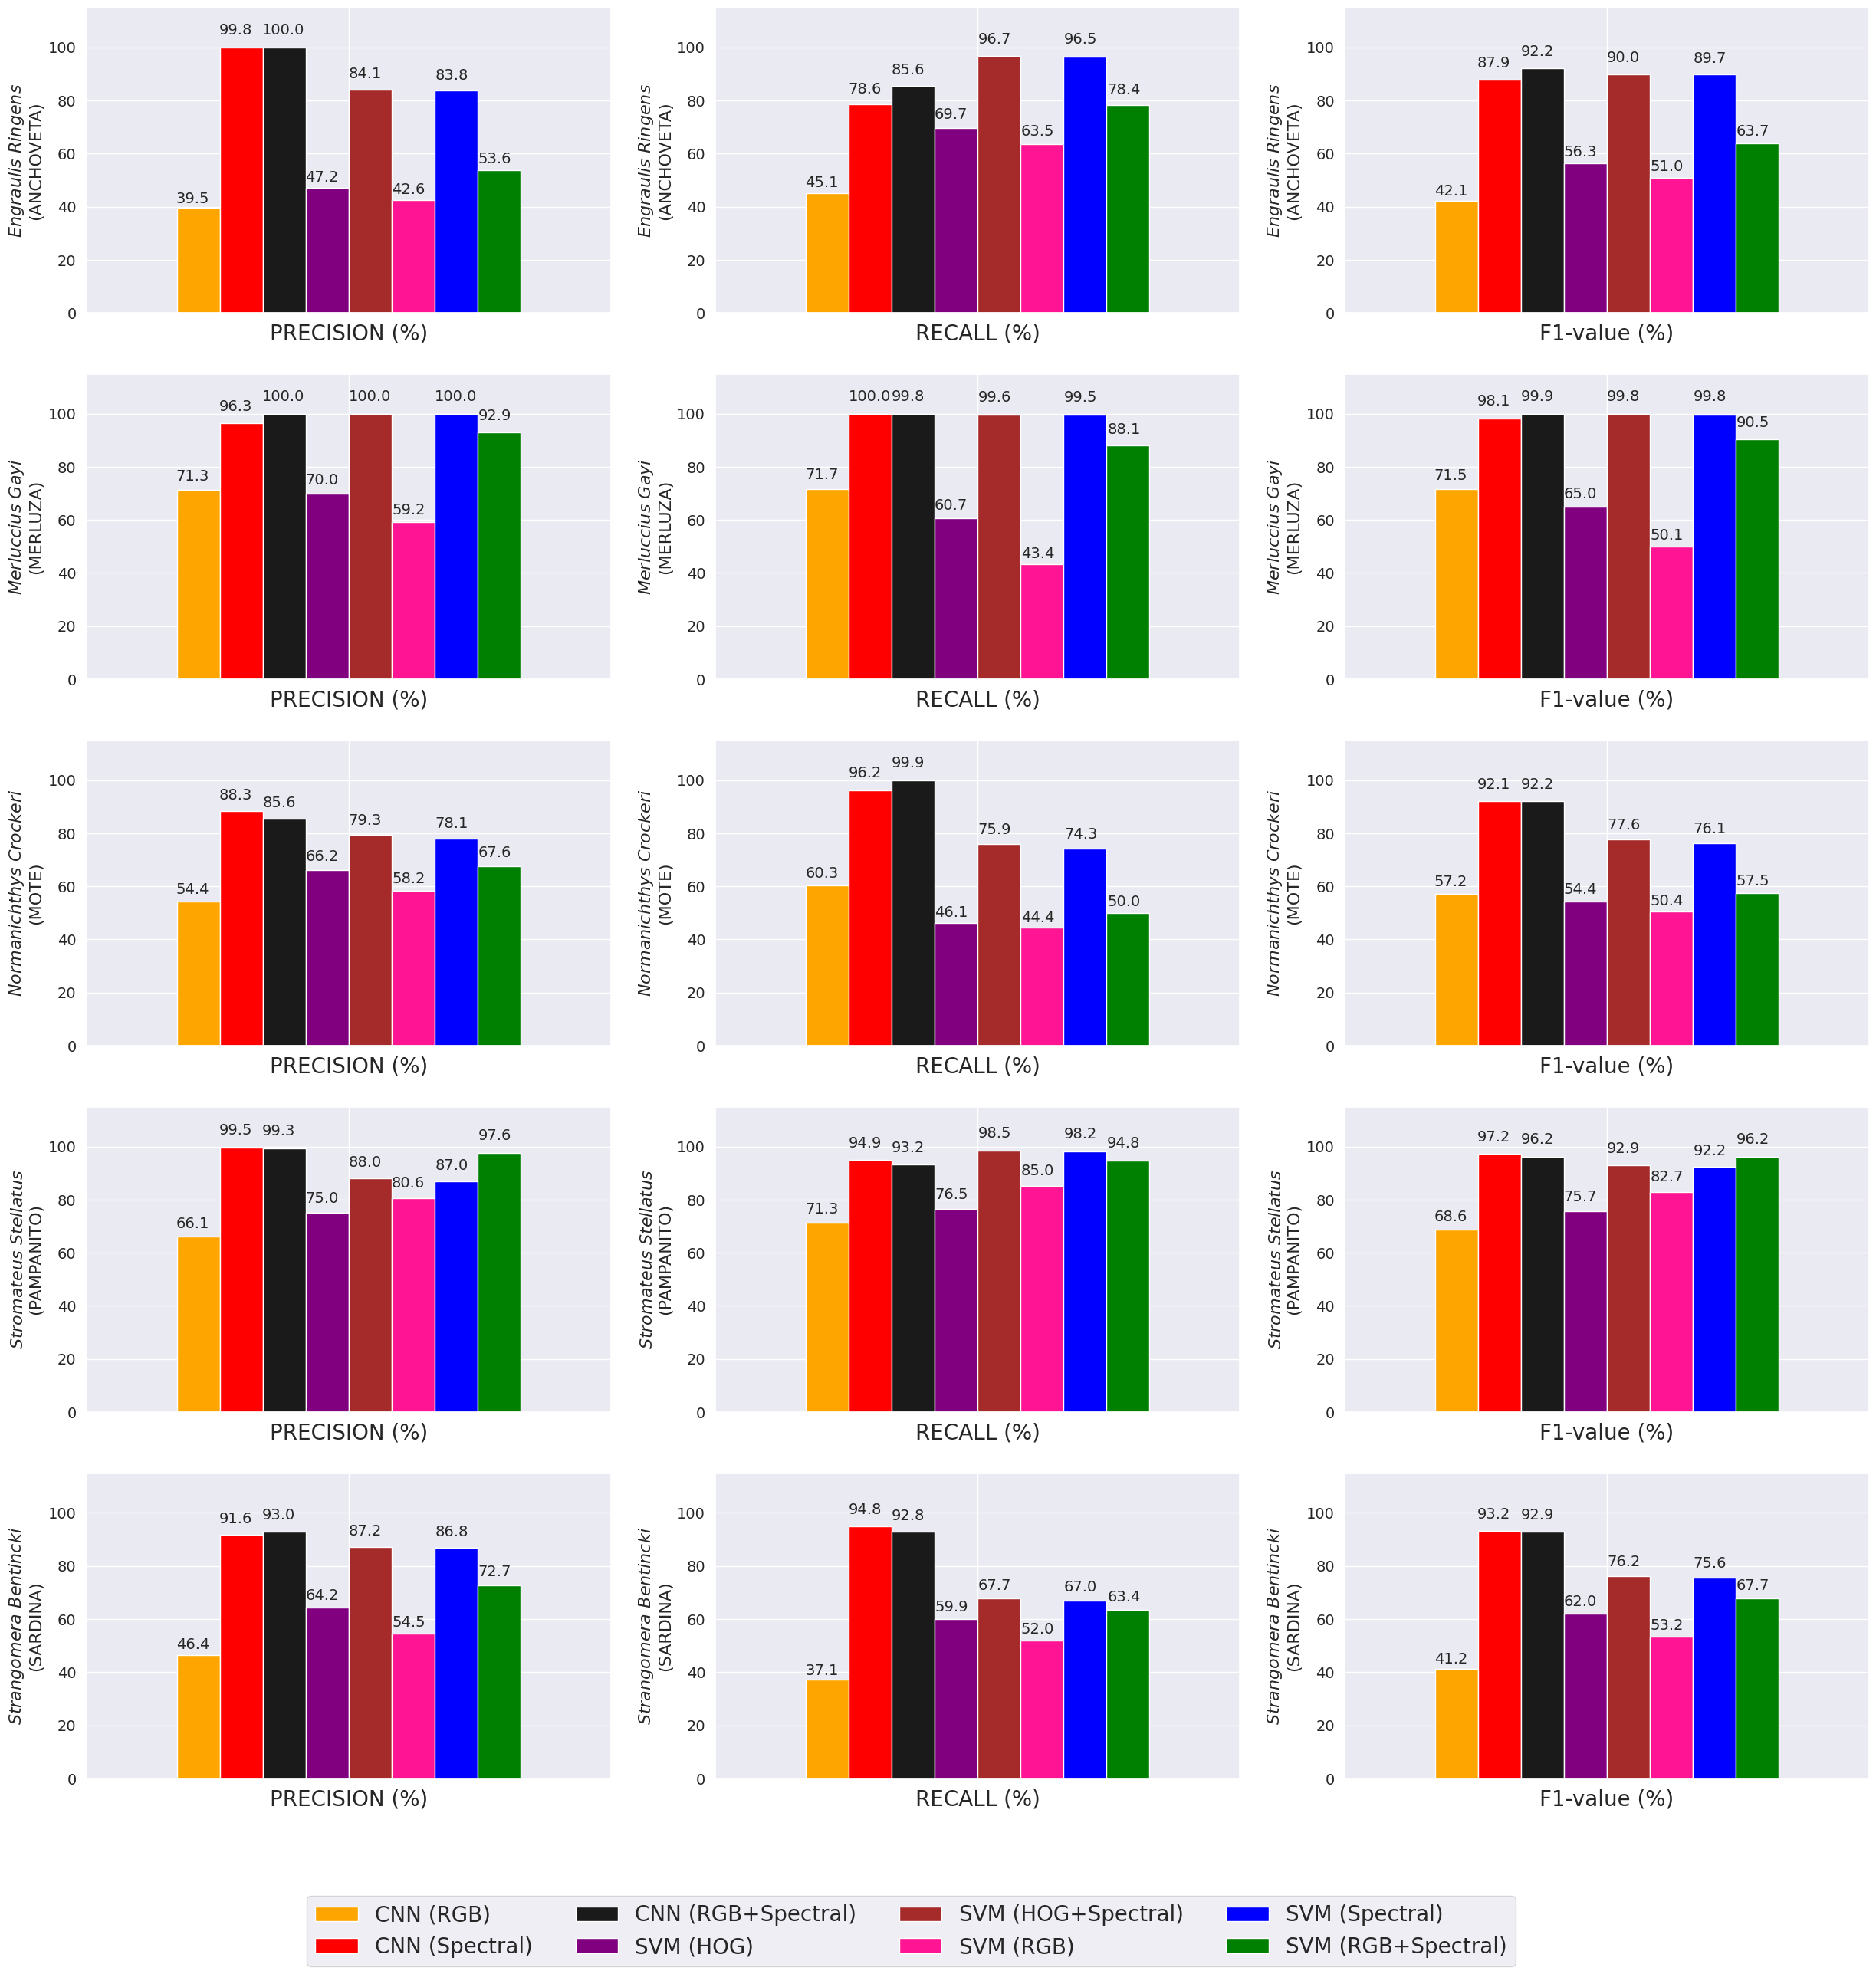

In [3]:
import pandas as pd
from matplotlib import pylab
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1.8)

#RESULTS (classes)
metrics = ['precision', 'recall', 'f1']
replace_key = {
'dl_DL__both': 'CNN (RGB+Spectral)',
'dl_DL__RGB': 'CNN (RGB)',
'dl_DL__SPEC': 'CNN (Spectral)',
'dl_DL__BOTH': 'CNN (RGB+Spectral)',
'svm_IE__Images': 'SVM (RGB)',
'svm_IE__Spectral': 'SVM (Spectral)',
'svm_IE__both': 'SVM (RGB+Spectral)',
'svm_HOG__Images': 'SVM (HOG)',
'svm_HOG__both': 'SVM (HOG+Spectral)',
}
labels = [r'${Engraulis~Ringens}$'+'\n(ANCHOVETA)', r'$Merluccius~Gayi$'+'\n(MERLUZA)', '$Normanichthys~Crockeri$'+'\n(MOTE)', '$Stromateus~Stellatus$'+'\n(PAMPANITO)', '$Strangomera~Bentincki$'+'\n(SARDINA)']
colors = ['orange', 'red', 'k', 'purple', 'brown', 'deeppink', 'blue', 'green']

fig = pylab.figure(1, figsize=(30,30))
for cdx in range(len(labels)):
  for idx in range(len(metrics)):
    results_per_class_aux = dict( [ ( replace_key[key.replace('_'+metrics[idx], '')], np.array([results_class[key][cdx]])) for key in results_class if '_'+metrics[idx] in key ] )
    ax = pylab.subplot(5,3, 3*cdx+idx+1 )
    df = pd.DataFrame( results_per_class_aux )
    if (cdx+1)*(idx+1) == 15:
      df.plot( kind = 'bar', ax = ax, width = 0.95, stacked = False, legend=True, color=colors )#, edgecolor='white', linewidth=3)
      ax.legend( loc = 'center left', bbox_to_anchor = (-2.0, -0.5), frameon = True, ncol = 4, fontsize = 20 )
    else:
      df.plot( kind = 'bar', ax = ax, width = 0.95, stacked = False, legend=False, color=colors )#, edgecolor='white', linewidth=2)
    for p in ax.patches:
      ax.annotate("%.1f" %np.round(p.get_height(), 2), (p.get_x() * 1.005, p.get_height() * 1.05), size=14)
    ax.set_ylabel( labels[cdx], fontsize=16 ) #20
    ax.set_xticklabels( [metrics[idx].upper().replace('F1','F1-value')+' (%)'], rotation = 'horizontal', fontsize = 20 )
    ax.set_ylim([0, 115])
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True)

pylab.show()

# Classification error

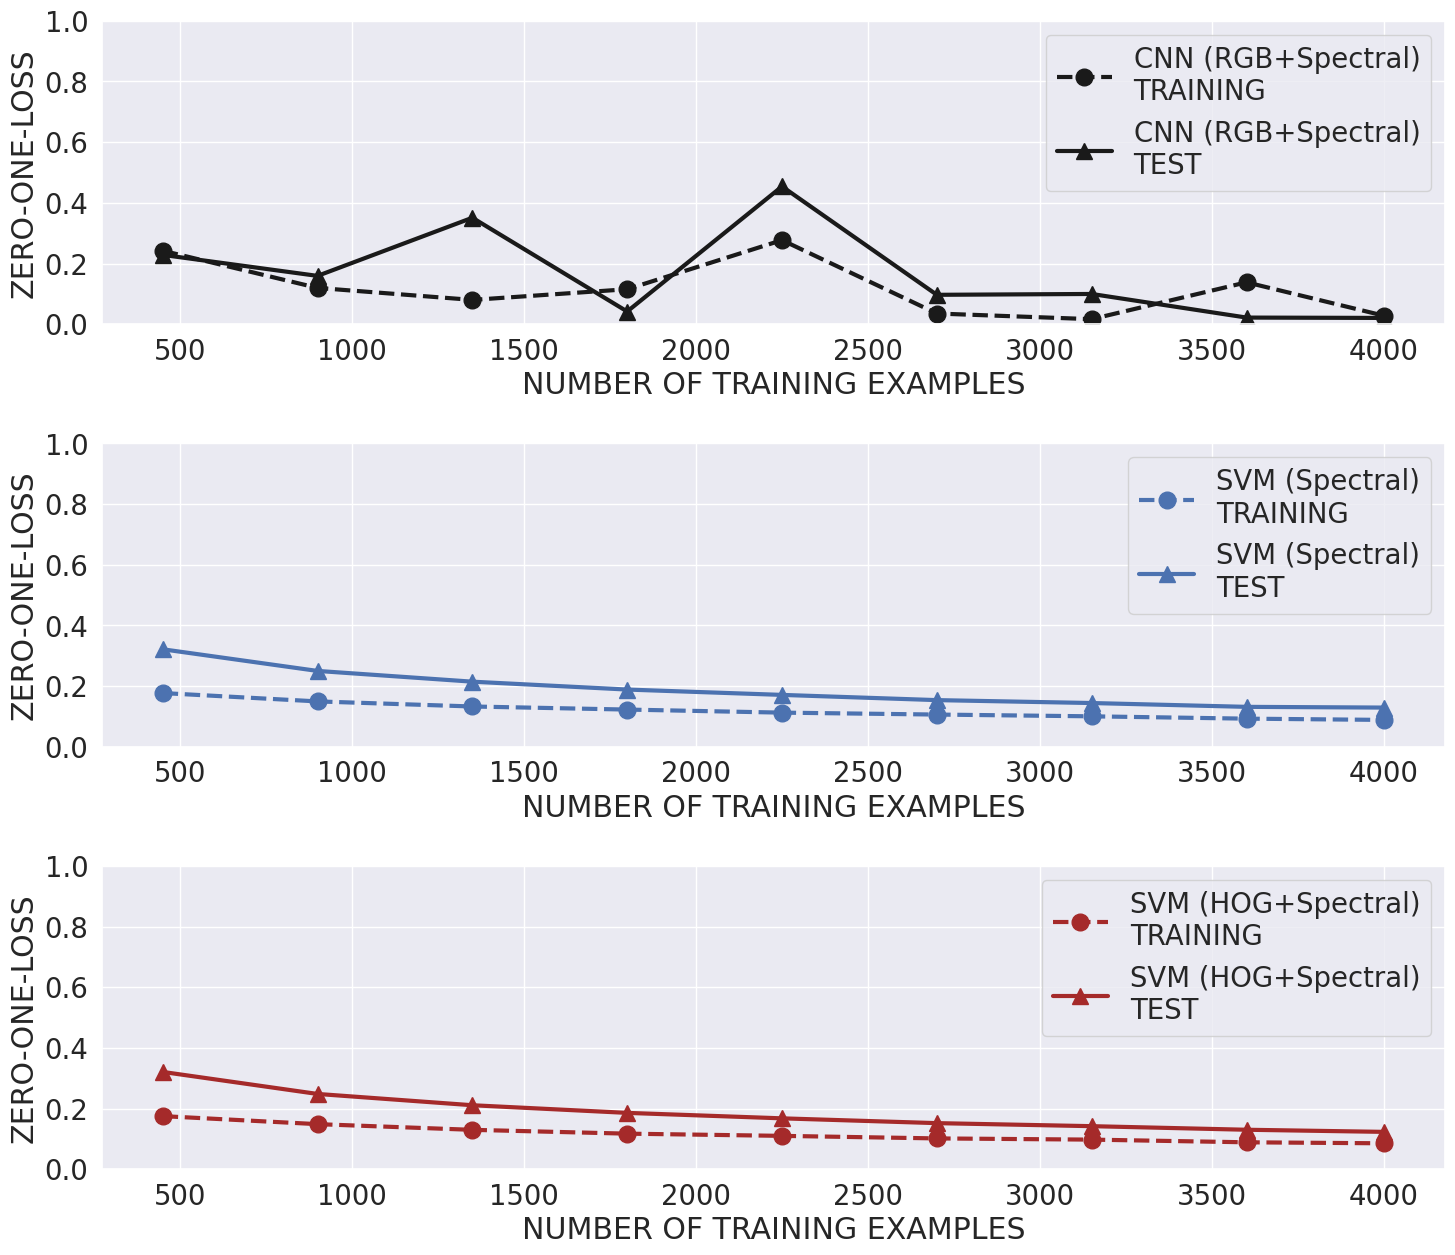

In [4]:
import pandas as pd
from matplotlib import pylab
from sklearn.metrics import zero_one_loss
import os
import pickle
import numpy as np
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1.8)

#RESULTS LC
runs = 1
folds = 5

colors = {
          'svm__Images_training_IE':'deeppink','svm__Images_test_IE':'deeppink',
          'svm__Images_training_HOG':'purple','svm__Images_test_HOG':'purple',
          'svm__Spectral_training_IE':'b','svm__Spectral_test_IE':'b',
          'svm__both_training_IE':'g','svm__both_test_IE':'g',
          'svm__both_training_HOG':'brown','svm__both_test_HOG':'brown',
          'dl__both_training_DL':'k','dl__both_test_DL':'',
          'dl_-RGB_training_DL':'orange','dl_-RGB_test_DL':'orange',
          'dl_-SPEC_training_DL':'r','dl_-SPEC_test_DL':'r',
          'dl_-BOTH_training_DL':'k','dl_-BOTH_test_DL':'k'
          }

markers = {
          'training':'o',
          'test':'^',
          }

replace_key = {
'dl_DL__both': 'CNN (RGB+Spectral)',
'dl_DL_-RGB': 'CNN (RGB)',
'dl_DL_-SPEC': 'CNN (Spectral)',
'dl_DL_-BOTH': 'CNN (RGB+Spectral)',
'svm_IE__Images': 'SVM (RGB)',
'svm_IE__Spectral': 'SVM (Spectral)',
'svm_IE__both': 'SVM (RGB+Spectral)',
'svm_HOG__Images': 'SVM (HOG)',
'svm_HOG__both': 'SVM (HOG+Spectral)',
}

featuresCLF = ['DL', 'IE', 'HOG']

fig = pylab.figure(1, figsize = (15,13))

idx = 1
for featureCLF in featuresCLF:

  if 'DL' in featureCLF:
    features = ['-BOTH']
    classifiers = ['dl']
  elif featureCLF=='IE':
    features = ['_Spectral']
    classifiers = ['svm']
  elif featureCLF == 'HOG':
    features = ['_both']
    classifiers = ['svm']

  for clf in classifiers:
    for feature in features:
      results_training, results_test = [], []
      for r in range(runs):
        for k in range(folds):
          #training
          tipocurva = 'training'
          with open( os.path.join( os.getcwd(), 'out', 'ResultsLC', clf.upper(), 'results_lc_'+clf+'_'+featureCLF+feature+'_'+tipocurva+'_r_'+str(r+1)+'_f_'+str(k+1)+'.pkl' ), 'rb' ) as a:
            file_tr = pickle.load(a)
          #testing
          tipocurva = 'testing'
          with open( os.path.join( os.getcwd(), 'out', 'ResultsLC', clf.upper(), 'results_lc_'+clf+'_'+featureCLF+feature+'_'+tipocurva+'_r_'+str(r+1)+'_f_'+str(k+1)+'.pkl' ), 'rb' ) as a:
            file_t = pickle.load(a)
            x_axis = file_t['x']
            training = file_tr['training'] #true, training (labels)
            test = file_t['test'] #true, training (labels)
            results_training_aux = []
            results_test_aux = []
            for batch in range(len(x_axis)):
              training_true, training_pred = training[batch]
              test_true, test_pred = test[batch]
              results_training_aux.append( zero_one_loss(training_true, training_pred) )
              results_test_aux.append( zero_one_loss(test_true, test_pred) )
            results_training.append( results_training_aux )
            results_test.append( results_test_aux )

      results_training = np.array(results_training)
      error_training = np.std( results_training, axis = 0 )
      results_training = np.mean(results_training, axis = 0)
      results_test = np.array(results_test)
      error_test = np.std( results_test, axis = 0 )
      results_test = np.mean(results_test, axis = 0)

      ax = pylab.subplot(3,1,idx)
      pylab.plot(x_axis, results_training, colors[clf+'_'+feature+'_training_'+featureCLF], marker=markers['training'], linestyle='--', ms=12, lw = 3, label = replace_key[clf+'_'+featureCLF+'_'+feature]+'\nTRAINING')
      pylab.plot(x_axis, results_test, colors[clf+'_'+feature+'_test_'+featureCLF], marker=markers['test'], ms=12, lw = 3, label = replace_key[clf+'_'+featureCLF+'_'+feature]+'\nTEST')
      pylab.xlabel('Number of training examples'.upper() )
      pylab.ylabel('Zero-One-Loss'.upper() )
      pylab.ylim([0, 1])
      pylab.grid(True)
      ax.legend( loc='upper right')
  idx+=1

fig.tight_layout()
pylab.show()
